<a href="https://colab.research.google.com/github/licm34/AI-sec/blob/master/cnn_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import keras

from keras.models import Sequential
from keras.layers import Conv2D, Dense, Flatten, MaxPooling2D, AveragePooling2D
from keras.optimizers import Adam
from keras.losses import sparse_categorical_crossentropy as scc
from keras.datasets import cifar10

import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def build_model(width, height, channel):
  model = Sequential()

  model.add(Conv2D(
      filters=16,
      kernel_size=(3, 3), 
      padding='same',
      activation='relu',
      input_shape=(width, height, channel)
  ))
  model.add(Conv2D(
      filters=16,
      kernel_size=(3, 3), 
      padding='same',
      activation='relu',
  ))
  model.add(MaxPooling2D(
      pool_size=(2, 2), 
      padding='same'
  ))

  model.add(Conv2D(
      filters=32,
      kernel_size=(3, 3), 
      padding='same',
      activation='relu'
  ))
  model.add(MaxPooling2D(
      pool_size=(2, 2), 
      padding='same'
  ))

  model.add(Conv2D(
      filters=64,
      kernel_size=(3, 3), 
      padding='same',
      activation='relu',
  ))
  model.add(AveragePooling2D(
      pool_size=(8, 8), 
      padding='same'
  ))

  model.add(Flatten())
  model.add(Dense(
      units=640,
      activation='relu'
  ))
  model.add(Dense(
      units=10,
      activation='softmax'
  ))
  
  opt = Adam(learning_rate=0.001)
  model.compile(
      optimizer=opt, 
      loss=scc, 
      metrics=['accuracy']
  )

  return model

In [ ]:
#(X_train, Y_train), (X_test, Y_test) = data_preprocessing()
def data_preprocessing():
  (X_train, Y_train), (X_test, Y_test) = cifar10.load_data()

  mean = [0, 0, 0]
  std = [0, 0, 0]
  newX_train = np.ones(X_train.shape)
  newX_test = np.ones(X_test.shape)

  for i in range(3):
    mean[i] = np.mean(X_train[:, :, :, i])
    std[i] = np.std(X_train[:, :, :, i])

  for i in range(3):
    newX_train[:, :, :, i] = X_train[:, :, :, i] - mean[i]
    newX_train[:, :, :, i] = newX_train[:, :, :, i] / std[i]
    newX_test[:, :, :, i] = X_test[:, :, :, i] - mean[i]
    newX_test[:, :, :, i] = newX_test[:, :, :, i] / std[i]

  X_train = newX_train
  X_test = newX_test

  return (X_train, Y_train), (X_test, Y_test)

In [30]:
(X_train, Y_train), (X_test, Y_test) = cifar10.load_data()

model = build_model(X_train.shape[1], X_train.shape[2], X_train.shape[3])

hist = model.fit(
    X_train, Y_train,
    batch_size=32,
    epochs=80,
    verbose=1,
    shuffle=True,
    validation_split=0.05
)

model.evaluate(X_test, Y_test, verbose=1)

Epoch 1/80
1485/1485 [==============================] - 10s 7ms/step - loss: 1.5969 - accuracy: 0.4121 - val_loss: 1.2834 - val_accuracy: 0.5396
Epoch 2/80
1485/1485 [==============================] - 9s 6ms/step - loss: 1.1792 - accuracy: 0.5771 - val_loss: 1.0594 - val_accuracy: 0.6240
Epoch 3/80
1485/1485 [==============================] - 9s 6ms/step - loss: 1.0095 - accuracy: 0.6401 - val_loss: 0.9477 - val_accuracy: 0.6724
Epoch 4/80
1485/1485 [==============================] - 9s 6ms/step - loss: 0.8994 - accuracy: 0.6829 - val_loss: 0.8946 - val_accuracy: 0.6824
Epoch 5/80
1485/1485 [==============================] - 9s 6ms/step - loss: 0.8223 - accuracy: 0.7113 - val_loss: 0.8591 - val_accuracy: 0.7048
Epoch 6/80
1485/1485 [==============================] - 9s 6ms/step - loss: 0.7600 - accuracy: 0.7332 - val_loss: 0.7646 - val_accuracy: 0.7336
Epoch 7/80
1485/1485 [==============================] - 9s 6ms/step - loss: 0.7216 - accuracy: 0.7469 - val_loss: 0.7893 - val_accuracy

[2.095536231994629, 0.7117999792098999]

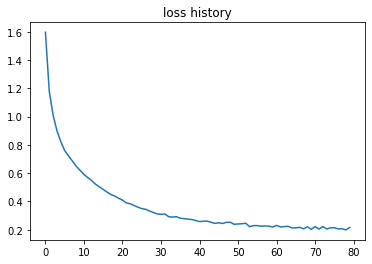

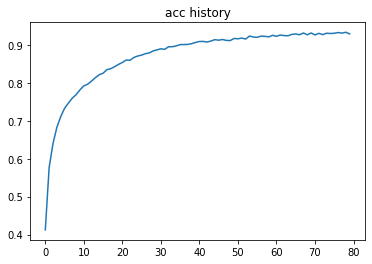

In [31]:
plt.plot(hist.history['loss'])
plt.title("loss history")
plt.show()

plt.plot(hist.history['accuracy'])
plt.title("acc history")
plt.show()